# Chapter 3. 평가

- 머신러닝은 [데이터 가공/변환 - 모델 학습/예측 - 평가]의 프로세스로 구성됨
- 머신러닝 모델은 여러 방법으로 예측 성능 평가함
- 성능 평가 지표
  - 회귀 모델
    - 실제값과 예측값의 오차 평균값에 기반
  - 분류 모델
    - 이진 분류: 결정 클래스 값 종류의 유형에 따라 긍정/부정과 같은 2개의 결괏값만 가짐
    - 멀티 분류: 여러 개의 결정 클래스 값을 가짐
    - 분류의 성능 평가 지표
      - 정확도(Accuracy)
      - 오차행렬(Confusion Matrix)
      - 정밀도(Precision)
      - 재현율(Recall)
      - F1 스코어
      - ROC AUC
    

## 1. 정확도(Accuracy)

- 실제 데이터에서 예측 데이터가 얼마나 같은지를 판단하는 지표
- (예측 결과가 동일한 데이터 건수) / (전체 예측 데이터 건수)
- 직관적으로 모델 예측 성능을 나타내는 평가 지표
- BUT 이진 분류의 경우 데이터의 구성에 따라 ML 모델의 성능 왜곡할 가능성 있음 => 정확도 외 다른 수치와 함께 평가

In [27]:
### fit() 메서드는 아무 것도 수행하지 않고, predict()는 Sex 피처가 1이면 0, 그렇지 않으면 1로 예측하는 단순한 분류기 생성

from sklearn.base import BaseEstimator
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

class MyDummyClassifier(BaseEstimator):
    # fit 메서드는 아무것도 학습하지 않음
    def fit(self, X, y=None):
        pass
    # predict 메서드는 단순히 Sex 피처가 1이면 0, 아니면 1로 예측
    def predict(self, X):
        pred = np.zeros( (X.shape[0],1) )
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i] == 1:
                pred[i] = 0
            else :
                pred[i] = 1 
        return pred

In [28]:
# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 원본 데이터를 재로딩, 데이터 가공, 학습 데이터/테스트 데이터 분할
titanic_df = pd.read_csv(r'C:\Users\이희원\OneDrive\바탕 화면\EWHA\4-1\ESAA\kaggle_data\titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis = 1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size = 0.2, random_state = 0)

# 위에서 생성한 Dummy Classifier를 이용해 학습/예측/평가 수행
myclf = MyDummyClassifier()
myclf.fit(X_train, y_train)

mypredictions = myclf.predict(X_test)
print('Dummy Classifier의 정확도는: {0:.4f}'.format(accuracy_score(y_test, mypredictions)))

Dummy Classifier의 정확도는: 0.7877


In [30]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
    def fit(self, X, y):
        pass

    # 입력값으로 들어오는 X 데이터 세트의 크기만큼 모두 0값으로 만들어서 변환
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

# 사이킷런의 내장 데이터 세트인 load_digits()를 이용해 MNIST 데이터 로딩
digits = load_digits()

# digits 번호가 7번이면 True고 이를 astype(int)로 1로 변환, 7번이 아니면 False이고 0으로 변환
y = (digits.target == 7).astype(int)
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state = 11)

- 불균형한 데이터로 생성한 y_test의 데이터 분포도를 확인
- MyFakeClassifier를 이용해 예측과 평가 수행

In [31]:
# 불균형한 레이블 데이터 분포도 확인
print('레이블 테스트 세트 크기:', y_test.shape)
print('테스트 세트 레이블 0과 1의 분포도')
print(pd.Series(y_test).value_counts())

# Dummy Classifier로 학습/예측/정확도 평가
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train, y_train)

fakepred = fakeclf.predict(X_test)
print('모든 예측을 0으로 하여도 정확도는: {:.3f}'.format(accuracy_score(y_test, fakepred)))

레이블 테스트 세트 크기: (450,)
테스트 세트 레이블 0과 1의 분포도
0    405
1     45
Name: count, dtype: int64
모든 예측을 0으로 하여도 정확도는: 0.900


- 이처럼 정확도 평가 지표는 불균형한 레이블 데이터 세트에서는 성능 수치로 사용해서는 안 됨
- 정확도의 분류 평가 지표로서의 한계를 극복하기 위해 다른 분류 지표들과 함께 적용해야 함

## 2. 오차 행렬

- 오차행렬 = confusion matrix = 혼동행렬
- 이진 분류에서 성능 지표로 잘 활용됨
- 학습된 분류 모델이 예측을 수행하면서 얼마나 헷갈리고(confused) 있는지도 함께 보여주는 지표
- [이진 분류의 예측 오류가 얼마인지 + 어떤 유형의 예측 오류가 발생하고 있는지]를 함께 나타내는 지표
- 4분면(TN, FP, FN, TP) 행렬에서 실제 레이블 클래스 값과 예측 레이블 클래스 값이 어떤 유형을 가지고 매핑되는지 나타냄
- ex. TN: True Negative; 'True = 예측 클래스 값과 실제 클래스 값이 같다', 'Negative = 예측값이 negative 값이다'; 예측을 negative 값 0(부정)으로 예측했는데, 실제 값도 negative 값 0(부정)이라는 의미
- sklearn은 오차행렬을 구하기 위해 confusion_matrix() API 제공

- MyFakeClassifier의 예측 결과인 fakepred
- 실제 결과인 y_test

In [33]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, fakepred)

array([[405,   0],
       [ 45,   0]], dtype=int64)

- TN: array[0,0] = 405
- FP: array[0,1] = 0
- FN: array[1,0] = 45
- TP: array[1,1] = 0
- 테스트 데이터 세트의 클래스 값 분포는 0이 405건, 1이 45건
- TP, TN, FP, FN 값을 조합해 Classifier의 성능을 추정할 수 있는 주요 지표인 정확도, 정밀도, 재현율 값을 알 수 있음
- 정확도의 오차 행렬상에서의 재정의
  - 예측 결과와 실제 값이 동일한 건수/전체 데이터 수 = (TN + TP)/(TN + FP + FN + TP)

## 3. 정밀도와 재현율

- 불균형한 데이터 세트에서 정확도보다 더 선호되는 평가 지표
- Positive 데이터 세트의 예측 성능에 좀 더 초점을 맞춘 평가 지표
- 정밀도
  - TP / (FP + TP)
  - 예측을 Positive로 한 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율
  - Positive 예측 성능을 더욱 정밀하게 측정하기 위한 평가 지표
  - 양성 예측도라고도 함
  - TP 높이기 + FP 낮추기에 초점
- 재현율
  - TP / (FN + TP)
  - 실제 값이 Positive인 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율
  - 민감도(Sensitivity) 또는 TPR(True Positive Rate)라고도 불림
  - TP 높이기 + FN 낮추기에 초점
- 정밀도가 중요 지표인 경우
  - 실제 Negative 음성인 데이터 예특을 Positive 양성으로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우
  - ex. 스팸메일 여부를 판단하는 모델
- 재현율이 중요 지표인 경우
  - 실제 Positive 양성 데이터를 Negative로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우
  - ex. 암 판단 모델
  - ex. 보험 사기와 같은 금융 사기 적발 모델
- 재현율과 정밀도는 서로 보완적인 지표
- 가장 좋은 성능 평가는 재현율과 정밀도 모두 높은 수치를 얻는 것이나, 둘 중 어느 한 평가 지표만 매우 높고 다른 수치는 매우 낮은 경우는 바람직하지 않음
- sklearn은 정밀도 계산을 위해 precision_score(), 재현율 계산을 위해 recall_score() API 제공

- 평가를 간단하게 적용하기 위해 confusion matrix, accuracy, precision, recall 등의 평가를 한꺼번에 호출하는 get_clf_eval() 함수 만듦

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test,pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'. format(accuracy, precision, recall))

- 타이타닉 데이터를 다시 로드한 후 가공해 로지스틱 회귀를 기반으로 타이타닉 생존자를 예측하고 각 평가 수행

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 원본 데이터를 재로딩 하고, feature데이터 셋과 Label 데이터 셋 추출. 
titanic_df = pd.read_csv(r'C:\Users\이희원\OneDrive\바탕 화면\EWHA\4-1\ESAA\kaggle_data\titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived',axis=1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df, \
                                                  test_size=0.2, random_state=11)

lr_clf = LogisticRegression()

lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

### transform_features 오류

오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869


C:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


- 정밀도에 비해 재현율이 낮게 나옴 => 재현율 또는 정밀도를 강화할 방법?

### 3.1 정밀도/재현율 트레이드오프

- 분류하려는 업무 특성상 정밀도 or 재현율이 특별히 강조돼야 할 경우 분류의 결정 임곗값(threshold)을 조정해 정밀도 or 재현율 수치를 높일 수 있음
- BUT 둘은 상호 보완적인 평가 지표이기 때문에 어느 한쪽을 높이면 나머지 한쪽은 떨어짐 (Trade-off)

- predict_proba()
  - 개별 데이터별로 예측 확률을 반환
  - 학습이 완료된 사이킷런 Classifier 객체에서 호출 가능
  - 테스트 피처 데이터 세트를 파라미터로 입력 시, 테스트 피처 레코드의 개별 클래스 예측 확률을 반환
  - predict() 메서드와 유사 BUT 반환 결과가 예측 결과 클래스값이 나닌 예측 확률 결과임

In [39]:
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print('pred_proba() 결과 Shape: {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

# 예측 확률 array와 예측 결괏값 array를 병함(concatenate)해 예측 확률과 결괏값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)], axis=1)
print('두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n', pred_proba_result[:3])

pred_proba() 결과 Shape: (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.46181874 0.53818126]
 [0.87867007 0.12132993]
 [0.87717305 0.12282695]]
두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.46181874 0.53818126 1.        ]
 [0.87867007 0.12132993 0.        ]
 [0.87717305 0.12282695 0.        ]]


- 반환 결과인 ndarray는 0과 1에 대한 확률을 나타냄 => (첫 번째 칼럼 값) + (두 번째 칼럼 값) = 1
- 두 개의 칼럼 중에서 더 큰 확률 값으로 predict() 메서드가 최종 예측
- predict()
  - predict_proba() 메서드에 기반해 생성된 API
  - predict_proba() 호출 결과로 반환된 배열에서 분류 결정 임계값보다 큰 값이 들어 있는 칼럼의 위치를 받아서 최종적으로 예측 클래스를 결정

##### [다음 예제]
- threshold 변수를 특정 값으로 설정
- Binarizer 클래스를 객체로 생성
- 생성된 Binarizer 객체의 fit_transform() 메서드를 이용해 넘파이 ndarray를 입력하면\
  입력된 ndarray의 값을 지정된 threshold보다 같거나 작으면 0값으로, 크면 1값으로 변환해 반환

In [40]:
from sklearn.preprocessing import Binarizer

X = [[1, -1, 2],
     [2, 0, 0],
     [0, 1.1, 1.2]]

# X의 개별 원소들이 threshold 값보다 같거나 작으면 0을, 크면 1을 반환
binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


- 이제 이 Binarizer를 이용해 사이킷런 predict()의 의사(pseudo) 코드 생성

In [41]:
from sklearn.preprocessing import Binarizer

# Binarizer의 threshold 설정값, 분류 결정 임곗값임
custom_threshold = 0.5

# predict_proba() 반환값의 두 번째 칼럼, 즉 Positive 클래스 칼럼 하나만 추출해 Binarizer를 적용
pred_proba_1 = pred_proba[:, 1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869


- 이 의사 코드로 계산된 평가 지표는 앞 예제의 타이타닉 데이터로 학습된 로지스틱 회귀 Classifier 객체에서 호출된 predict()로 계산된 지표 값과 정확히 일치 <= predict()가 predict_proba()에 기반함
- 이 분류 결정 임곗값을 낮추면 평가 지표가 어떻게 변할까?

In [42]:
# Binarizer의 threshold 설정값을 0.4로 설정. 즉 분류 결정 임곗값을 0.5에서 0.4로 낮춤
custom_threshold = 0.4
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
cusotm_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869


- 임곗값을 낮춘 결과 재현율이 올라가고 정밀도가 떨어짐
- WHY?: 분류 결정 임곗값은 Positive 예측값을 결정하는 확률의 기준. 즉, 임곗값이 떨어지면 Positive로 예측을 더 너그럽게 하는 것.

In [43]:
# 이번에는 임곗값을 0.4에서부터 0.6까지 0.05씩 증가시키며 평가 지표를 조사: get_eval_by_threshold() 사용

# 테스트를 수행할 모든 임곗값을 리스트 객체로 저장
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    # thresholds list 객체 내의 값을 차례로 iteration하면서 Evaluation 수행
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:', custom_threshold)
        get_clf_eval(y_test, custom_predict)

get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.4
오차 행렬
[[99 19]
 [10 51]]
정확도: 0.8380, 정밀도: 0.7286, 재현율: 0.8361
임곗값: 0.45
오차 행렬
[[103  15]
 [ 12  49]]
정확도: 0.8492, 정밀도: 0.7656, 재현율: 0.8033
임곗값: 0.5
오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869
임곗값: 0.55
오차 행렬
[[109   9]
 [ 15  46]]
정확도: 0.8659, 정밀도: 0.8364, 재현율: 0.7541
임곗값: 0.6
오차 행렬
[[112   6]
 [ 16  45]]
정확도: 0.8771, 정밀도: 0.8824, 재현율: 0.7377


- precision_recall_curve(): 지금까지 임곗값 변화에 따른 평가 지표 값을 알아보는 코드를 작성했는데, 사이킷런에서 제공하는 이와 유사한 API

In [45]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일 때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

# 실제값 데이터 세트와 레이블 값이 1일 때의 예측 활률을 precision_recall_curve 인자로 입력
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print('반환된 분류 결정 임곗값 배열의 Shape:', thresholds.shape)

# 반환된 임곗값 배열 로우가 147건이므로 샘플로 10건만 추출하되, 임곗값을 15 step으로 추출
thr_index = np.arange(0, thresholds.shape[0], 15)
print('샘플 추출을 위한 임곗값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값:', np.round(thresholds[thr_index], 2))

# 15 step 단위로 추출된 임곗값에 따른 정밀도와 재현율 값
print('샘플 임곗값별 정밀도:', np.round(precisions[thr_index], 3))
print('샘플 임곗값별 재현율:', np.round(recalls[thr_index], 3))

반환된 분류 결정 임곗값 배열의 Shape: (165,)
샘플 추출을 위한 임곗값 배열의 index 10개: [  0  15  30  45  60  75  90 105 120 135 150]
샘플용 10개의 임곗값: [0.01 0.09 0.11 0.13 0.15 0.23 0.35 0.5  0.63 0.75 0.89]
샘플 임곗값별 정밀도: [0.341 0.372 0.415 0.448 0.505 0.585 0.688 0.774 0.913 0.935 0.938]
샘플 임곗값별 재현율: [1.    1.    0.967 0.918 0.902 0.902 0.869 0.787 0.689 0.475 0.246]


- 임곗값이 증가할수록 정밀도 값은 동시에 높아지나 재현율 값은 낮아짐
- precision_recall_curve(): 정밀도와 재현율의 임곗값에 따른 값 변화를 곡선 형태의 그래프로 시각화하는 데 이용

In [46]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

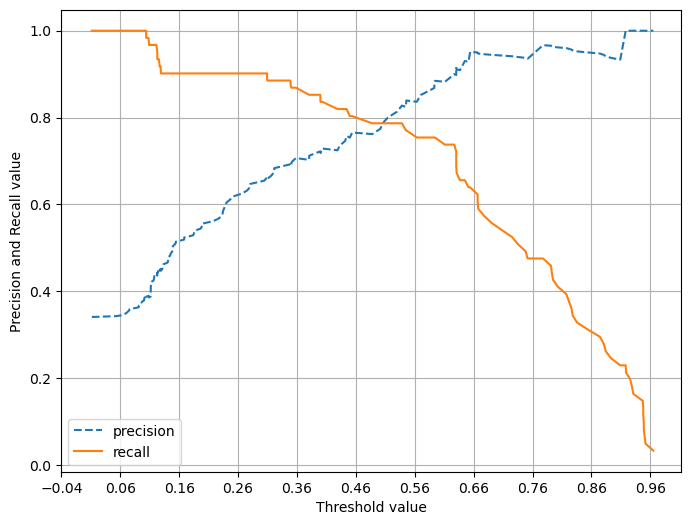

In [51]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
  # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출.
  precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

  # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
  plt.figure(figsize=(8,6))
  threshold_boundary = thresholds.shape[0]
  plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
  plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')

  # threshold 값 X축의 Scale을 0.1 단위로 변경
  start, end = plt.xlim()
  plt.xticks(np.round(np.arange(start,end,0.1),2))

  # x축, y축 label과 legend, 그리고 grid 설정
  plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
  plt.legend(); plt.grid()
  plt.show()

precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])

[그래프 결과 해석]
- 정밀도는 점선, 재현율은 실선으로 표현됨
- 임곗값이 낮을수록 많은 수의 양성 예측으로 인해 재현율 값이 극도로 높아지고 정밀도 값이 극도로 낮아짐

### 3.2 정밀도와 재현율의 맹점

- 정밀도와 재현율을 조정하기 위한 임곗값 변경은 업무 환경에 맞게 두 개의 수치를 상호 보완할 수 있는 수준해서 적용되어야 함. 단순히 하나의 성능 지표 수치를 높이기 위한 수단으로 사용되면 안 됨.

#### 3.2.1 정밀도가 100%가 되는 방법 (bad case)

- 확실한 기준이 되는 경우만 Positive로 예측하고 나머지는 모두 Negative로 예측
- ex. 환자가 80세 이상이고 비만이며 이전에 암 진단을 받았고 암 세포의 크기가 상위 0.1% 이상이면 무조건 Positive, 다른 경우는 Negative로 예측

#### 3.2.2 재현율이 100%가 되는 방법 (bad case)

- 모든 환자를 Positive로 예측

## 4. F1 스코어

- 정밀도와 재현율을 결합한 지표
- 정밀도와 재현율이 어느 한쪽으로 치우치지 않는 수치를 나타낼 때 상대적으로 높은 값을 가짐
- f1_score()

In [52]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, pred)
print('F1 스코어: {0:.4f}', format(f1))

F1 스코어: {0:.4f} 0.7804878048780488


[타이타닉 생존자 예측에서 임곗값을 변화시키면서 F1 스코어를 포함한 평가 지표 구하기]

In [53]:
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    # F1 스코어 추가
    f1 = f1_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    # f1 score print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}'.format(accuracy, precision, recall, f1))

thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.4
오차 행렬
[[99 19]
 [10 51]]
정확도: 0.8380, 정밀도: 0.7286, 재현율: 0.8361, F1:0.7786
임곗값: 0.45
오차 행렬
[[103  15]
 [ 12  49]]
정확도: 0.8492, 정밀도: 0.7656, 재현율: 0.8033, F1:0.7840
임곗값: 0.5
오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869, F1:0.7805
임곗값: 0.55
오차 행렬
[[109   9]
 [ 15  46]]
정확도: 0.8659, 정밀도: 0.8364, 재현율: 0.7541, F1:0.7931
임곗값: 0.6
오차 행렬
[[112   6]
 [ 16  45]]
정확도: 0.8771, 정밀도: 0.8824, 재현율: 0.7377, F1:0.8036


## 5. ROC 곡선과 AUC

- ROC 곡선과 AUC 스코어는 이진 분류의 예측 성능 측정에서 중요하게 사용되는 지표
- ROC 곡선
  - Receiver Operation Charactereistic Curve, 수신자 판단 곡선
  - 일반적으로 의학 분야에서 많이 사용되지만 머신러닝의 이진 분류 모델의 예측 성능 판단의 중요 지표
  - FPR(False Positive Rate)이 변할 때 TPR(True Positive Rate)이 어떻게 변하는지를 나타내는 곡선 
  - ROC 곡선을 구하는 방법: FPR을 0부터 1까지 변경하면서 TPR의 변화 값을 구함
    <br>=> 어떻게 FPR을 0부터 1까지 변경?: 분류 결정 임곗값 변경
    - 분류 결정 임곗값
      - Positive 예측값을 결정하는 확률의 기준
      - FPR을 0으로 만들려면 임곗값을 1로 지정
      - 임곗값을 1로 지정하면 Positive 예측 기준이 매우 높기 때문에 분류기(Classifier)가 임곗값보다 높은 확률을 가진 데이터를 Positive로 예측할 수 없기 때문
      - 반대로 FPR을 1로 만들려면, 분류 결정 임곗값을 0으로 지정해서 TN을 0으로 만들면 됨. 
  - FPR을 X축으로, TPR을 Y축으로 잡으면, FPR의 변화에 따른 TPR의 변화가 곡선 형태로 나타남
    - FPR
      - 재현율, 민감도
      - TP/(FN+TP)
      - 실제값 Positive가 정확히 예측되어야 하는 수준: 질병이 있는 사람은 질병이 있는 것으로 양성 판정
    - TNR
      - 특이성 (Specificity)
      - TN/(FP+TN)
      - ROC 곡선의 X축 기준인 FPR은 FP/(FP+TN)이므로 '1-TNR' 또는 '1-특이성'으로 표현됨
      - 실제값 Negative가 정확히 예측되어야 하는 수준: 질병이 없는 사람은 질병이 없는 것으로 음성 판정
  - ROC 곡선의 가운데 직선: ROC 곡선의 최저 값
  - 왼쪽 하단과 오른쪽 상단을 대각선으로 이은 직선: 동전을 무작위로 던져 앞/뒤를 맞추는 랜덤 수준의 이진 분류의 ROC 직선 (AUC는 0.5)
  - ROC 곡선이 가운데 직선에 가까울수록 성능이 떨어지고 멀어질수록 성능이 뛰어난 것
- roc_curve() API
  - ROC 곡선을 구하기 위해 사이킷런에서 제공하는 API 
  - 반환값이 FPR, TPR, 임곗값으로 구성됨

In [54]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일 떄의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)
# 반환된 임곗값 배열 로우가 47건이므로 샘플로 10건만 추출하되, 임곗값을 5 Step으로 추출.
# thresholds[0]은 max(예측확률)+1로 임의 설정됨. 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0], 5)
print('샘플 추출을 위한 임곗값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값:', np.round(thresholds[thr_index], 2))

# 5 step 단위로 추출된 임계값에 따른 FPR, TPR 값
print('샘플 임곗값별 FPR:', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR:', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임곗값 배열의 index 10개: [ 1  6 11 16 21 26 31 36 41 46 51]
샘플용 10개의 임곗값: [0.97 0.65 0.63 0.56 0.45 0.4  0.35 0.15 0.13 0.11 0.11]
샘플 임곗값별 FPR: [0.    0.017 0.034 0.076 0.127 0.169 0.203 0.466 0.585 0.686 0.797]
샘플 임곗값별 TPR: [0.033 0.639 0.721 0.754 0.803 0.836 0.885 0.902 0.934 0.967 0.984]


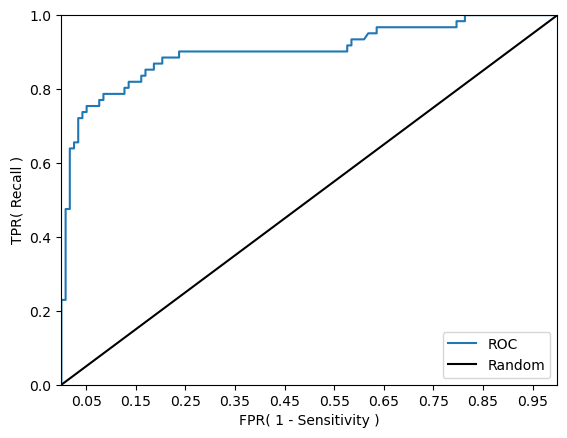

In [57]:
def roc_curve_plot(y_test, pred_proba_c1):
  # 임곗값에 따른 FPR, TPR 값을 반환받음.
  fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
  # ROC 곡선을 그래프 곡선으로 그림.
  plt.plot(fprs, tprs, label='ROC')
  # 가운데 대각선 직선을 그림.
  plt.plot([0,1],[0,1],'k-',label='Random')

  # FPR X축의 Scale을 0.1 단위로 변경, X, Y축 명 설정 등
  start, end = plt.xlim()
  plt.xticks(np.round(np.arange(start,end,0.1),2))
  plt.xlim(0,1);plt.ylim(0,1)
  plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
  plt.legend()

roc_curve_plot(y_test, pred_proba[:,1])

In [58]:
from sklearn.metrics import roc_auc_score

pred = lr_clf.predict(X_test)
roc_score = roc_auc_score(y_test, pred)
print('ROC AUC 값: {0:.4f}'.format(roc_score))

ROC AUC 값: 0.8341


In [59]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
          F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))